In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
# Add project root to path - adjust the number of parent dirs (..) based on where your notebook is located
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


import src.datamodule as datamodule


import src.analysis as analysis
import src.utils as utils
import src.visualization as vis
from src.utils.pacman_data_reader import PacmanDataReader


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualization

For visualization we have one main class:
    - `vis.GameVisualizer`: for visualizing a game or multiple games from the dataset.

And two helper classes:
    - `analysis.GridAnalyzer`: for analyzing the grid of a game.
    - `vis.BaseVisualizer`: for plotting the grid of a game.

`GameVisualizer` is the main class for visualizing games. It provides higher level methods for visualizing the game grid, trajectories, and recurrence grids.

`GridAnalyzer` is a helper class that provides methods for analyzing the grid of a game. It is used to calculate the recurrence grid, velocity grid, and count grid of a game.

`BaseVisualizer` is a helper class that provides methods for plotting the grid of a game. It is used to plot the walls, pellets, and recurrence grid of a game is used by `GameVisualizer` and `GridAnalyzer`, not by user.

GridAnalyzer can be used for granular analysis of games and sub-trajectories.


In [14]:
GAME = 602
visualizer = vis.GameVisualizer(data_folder="../data/", verbose=True)

In [3]:
# visualizer.game_heatmap(game_id=[601, 602], normalize=True)


Found 1 games for game [602]


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000019458373090>


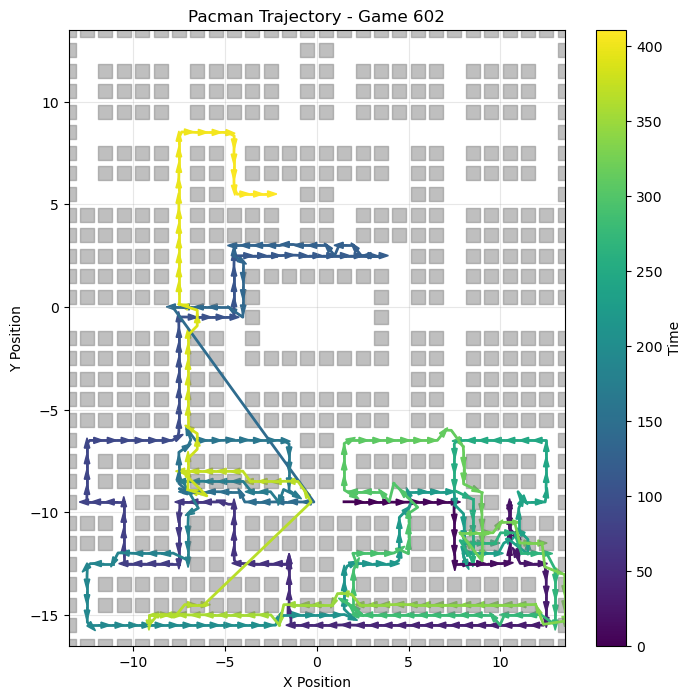

In [15]:
visualizer.trajectory_line_plot(game_id=GAME, time_step_delta=2, arrow_spacing=1)


Found 1 games for game [602]


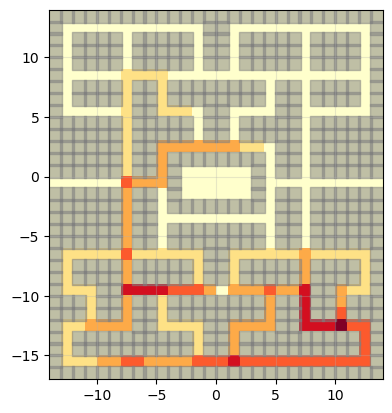

In [5]:
visualizer.game_heatmap(game_id=GAME, normalize=False)

# visualizer.multi_game_heatmap(trajectories=data['trajectory'][:, :, 1:], normalize=True)

Found 1 games for game [602]


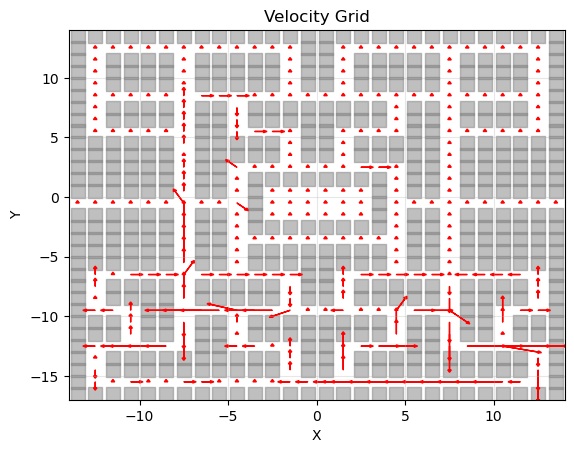

In [6]:
visualizer.plot_velocity_grid(game_id=GAME)

Same functions can be obtained from the `GridAnalyzer` class. But opposite to `GameVisualizer` the data needs to be provided.

In [7]:

data = PacmanDataReader(data_folder='../data/')
pacman_x , pacman_y = data.get_trajectory_tuple(game_id=GAME)

analyzer = analysis.GridAnalyzer()

recurrence_grid, idx_grid, velocity_grid = analyzer.calculate_recurrence_grid(pacman_x, pacman_y, calculate_velocities=True)



Found 1 games for game [602]


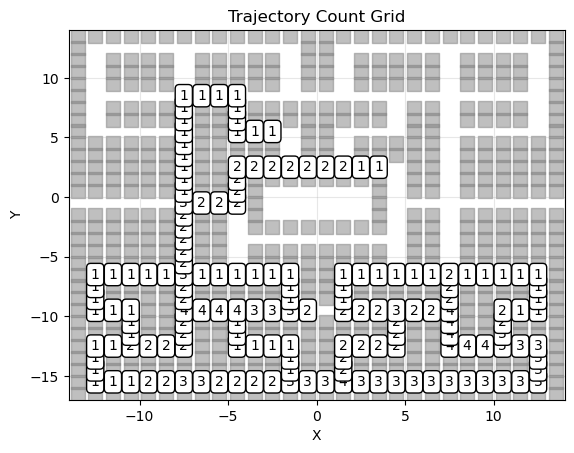

In [8]:
analyzer.plot_count_grid()

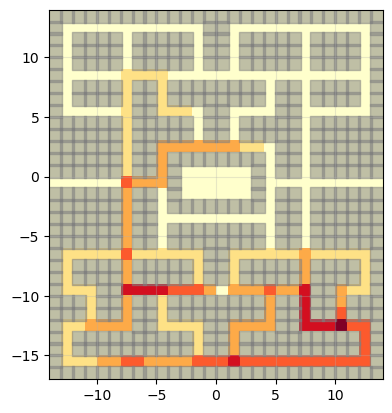

In [9]:
analyzer.plot_heatmap()

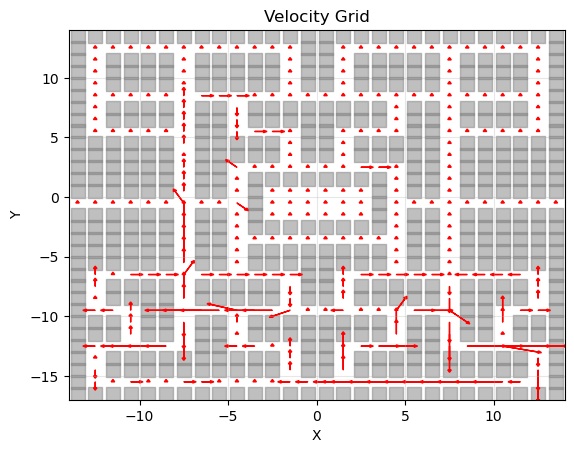

In [10]:
analyzer.plot_velocity_grid()